In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate as interpolate


os.chdir('C:/Users/jan_lenovo/Documents/MEGA/03_Doutoramento/06_Base de dados/School closure')

df_schools = pd.read_csv('Primary_schools_pivot.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'code': str}) 

df_migrations = pd.read_csv('MIGRANTS_pivot.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'code': str}) 

df_TFR = pd.read_csv('ISF_2017_pivot.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'code': str})

df_correspondencia = pd.read_csv('estrutura_NUTS3_4.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'CODICO': str})

df_pop_total = pd.read_csv('Pop_totais_grupo_etario_municipio.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'code': str})

df_nados_totais = pd.read_csv('Nados_totais.csv', engine='python', header = 0, sep = ";",\
                         dtype= {'code': str})


df_correspondencia.index = df_correspondencia.CODICO
df_correspondencia.drop("CODICO", axis=1, inplace=True)

df_nados_totais.index = df_nados_totais.code
df_pop_total.index=df_pop_total.code
df_schools.index=df_schools.code
df_TFR.index = df_TFR.code
df_migrations.index = df_migrations.code

df_schools = df_schools ['0101': '3101']
df_migrations = df_migrations.loc['0101':'1824','1999':'2016']
df_TFR = df_TFR.loc['0101':'1824','1999':'2016']


# sns.set()  # use Seaborn styles



In [2]:
df_correspondencia
# df_NOVO = df_TFR.merge(df_correspondencia)
df_TFR = pd.merge(df_TFR, df_correspondencia, right_index=True, left_index=True)
df_migrations = pd.merge(df_migrations, df_correspondencia, right_index=True, left_index=True)
df_schools = pd.merge(df_schools, df_correspondencia, right_index=True, left_index=True)
df_pop_total = pd.merge(df_pop_total, df_correspondencia, right_index=True, left_index=True)
df_nados_totais = pd.merge(df_nados_totais, df_correspondencia, right_index=True, left_index=True)

In [3]:
df_pop_total.loc[(df_pop_total.code == '1420') & (df_pop_total.ano == 2015), '15_19':'50_54']
# df_pop_total.loc[df_pop_total.ano == 2015,:] (df_pop_total.ano == 2011) & 
# df_pop_total.loc[df_pop_total.code == '1420', :]

,15_19,20_24,25_29,30_34,35_39,40_44,45_49,50_54
1420,182,156,169,217,217,271,241,270


In [4]:
municipio = '1420'
#nome_municipio = df_TFR.loc[municipio, : ].Município_Designação
#NUT_3 = df_TFR.loc[municipio, : ].NUTS_3_2002_Designação
#df_TFR[df_TFR['2011']==df_TFR['2011'].max()]

#df_pop_total.loc[municipio, ['ano','0_4','h0_4']]
df_pop_total['0_4_soma'] = df_pop_total['0_4'] +  df_pop_total['h0_4']
df_pop_total.loc[municipio, ['ano', 'Município_Designação', '0_4','h0_4', '0_4_soma']]

#df_nados_totais.loc[municipio]
#df_nados_totais.loc[municipio, ['ano', 'Município_Designação', '0_4','h0_4', '0_4_soma']]
#df_TFR.loc[municipio]

,ano,Município_Designação,0_4,h0_4,0_4_soma
1420,1993,Vila Nova da Barquinha,154,157,311
1420,1992,Vila Nova da Barquinha,170,154,324
1420,1991,Vila Nova da Barquinha,172,159,331
1420,1996,Vila Nova da Barquinha,152,159,311
1420,1995,Vila Nova da Barquinha,150,175,325
1420,1994,Vila Nova da Barquinha,148,157,305
1420,1999,Vila Nova da Barquinha,174,164,338
1420,1998,Vila Nova da Barquinha,167,156,323
1420,1997,Vila Nova da Barquinha,163,157,320
1420,2002,Vila Nova da Barquinha,172,167,339


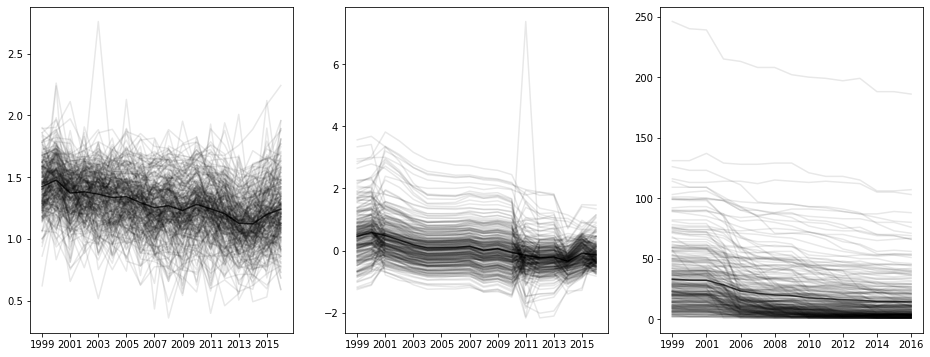

In [5]:
plt.rcParams["figure.figsize"] = [16,6]

tick_spacing = 2
fig, ax = plt.subplots(1, 3)
ax[0].plot(df_TFR.loc[:,'1999':'2016'].mean().T, color='black', alpha=0.7)
ax[0].plot(df_TFR.loc[:,'1999':'2016'].T, color='black', alpha=0.09)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax[1].plot(df_migrations.loc[:,'1999':'2016'].mean().T, color='black', alpha=0.7)
ax[1].plot(df_migrations.loc[:,'1999':'2016'].T, color='black', alpha=0.09)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax[2].plot(df_schools.loc[:,'1999':'2016'].mean().T, color='black', alpha=0.7)
ax[2].plot(df_schools.loc[:,'1999':'2016'].T, color='black', alpha=0.09)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show()


# df_migrations_2.pivot_table(df_migrations_2, index = 'ano', columns = 'code').plot(legend=False, color = 'black', alpha = 0.1)


In [6]:
df_migrations[df_migrations['2011']==df_migrations['2011'].max()]

df_migrations= df_migrations.drop(['1412'])

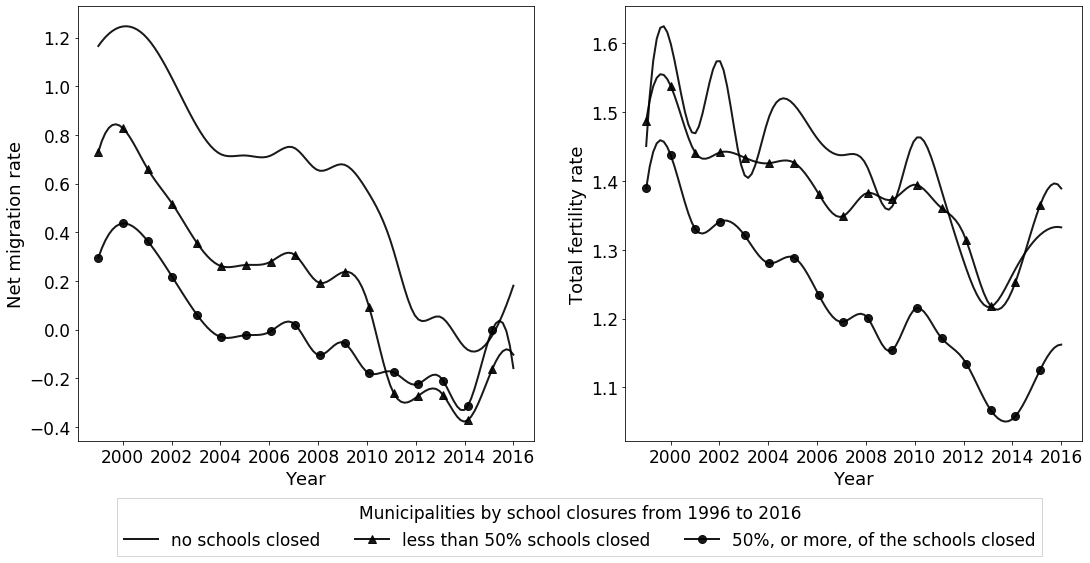

In [7]:
#plt.style.use('classic')
# sn.set()  # use Seaborn styles
df_schools=df_schools.assign(cat = lambda v: v.change_PS.apply(lambda change_PS: '50%, or more, of the schools closed'\
if change_PS<-50 else 'less than 50% schools closed' if change_PS<0 else 'no schools closed'),)
df_schools_migr = pd.merge(df_migrations, df_schools [['cat']],  right_index=True, left_index=True)
df_schools_TFR = pd.merge(df_TFR, df_schools [['cat']], right_index=True, left_index=True)


plt.rcParams["figure.figsize"] = [18,8]
tick_spacing = 2
linestyles = ['-ko', '-k^', '-k']
i = 0
N = 119
fig, ax = plt.subplots(1,2)

for a, grp in df_schools_migr.groupby('cat'):
    l=grp.loc[:,'1999':'2016'].mean()
    x = l.index.astype(np.float)
    y = l.values.astype(np.float)
    t, c, k = interpolate.splrep(x, y, s=0, k=3)
    xx = np.linspace(x.min(), x.max(), N)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)
    ax[0].plot(xx, spline(xx), linestyles[i], alpha = 0.9,\
    label = a, linewidth=2,markersize=8, markevery=7)
    ax[0].set_xlabel('Year', fontsize = 18)
    ax[0].set_ylabel('Net migration rate', fontsize = 18)
    i += 1
# handles, labels = ax[0].get_legend_handles_labels()
# order = [3,0,1,2]
# ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], prop={'size': 17})
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 17)


i = 0

for a, grp in df_schools_TFR.groupby('cat'):
    l=grp.loc[:,'1999':'2016'].mean()
    x = l.index.astype(np.float)
    y = l.values.astype(np.float)
    t, c, k = interpolate.splrep(x, y, s=0, k=3)
    xx = np.linspace(x.min(), x.max(), N)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)
    ax[1].plot(xx, spline(xx), linestyles[i], alpha = 0.9, \
    label = a, linewidth=2,markersize=8, markevery=7)
    ax[1].set_xlabel('Year', fontsize = 18)
    ax[1].set_ylabel('Total fertility rate', fontsize = 18)
    i += 1
handles, labels = ax[0].get_legend_handles_labels()
order = [2,1,0]
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 17)

plt.rcParams['font.size'] = 17
plt.rcParams.update()
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], prop={'size': 17}, 
           loc='upper center', bbox_to_anchor=(-0.1, -0.11),
           fancybox=False, shadow=False, ncol=3, title="Municipalities by school closures from 1996 to 2016")



#plt.savefig('TFR_MIG_Grupos_mun.tif', dpi=230,  bbox_inches="tight")
# ax[0].legend(loc=2, prop={'size': 6})



In [8]:
#df_TFR.loc[df_TFR.NUTS_3_2002_Código == '185','1999':'2016'].mean()
df_TFR[df_TFR['2011']==df_TFR['2011'].max()]
#df_TFR.loc[municipio, : ].NUTS_3_2002_Designação

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,Município_Designação,NUTS_3_2002_Código,NUTS_3_2002_Designação,NUTS_3_2013_Código,NUTS_3_2013_Designação
0815,0.860214,1.281237,0.995596,1.317897,1.582591,1.494305,1.369645,1.336249,1.187543,0.73845,...,1.1065,1.243055,1.610313,1.648682,1.442845,Vila do Bispo,150,Algarve,150,Algarve


In [9]:
# df_TFR.Município_Designação_x.iloc[,1]

df_TFR.loc[df_TFR.Município_Designação == 'Fundão']

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,Município_Designação,NUTS_3_2002_Código,NUTS_3_2002_Designação,NUTS_3_2013_Código,NUTS_3_2013_Designação
0504,1.330903,1.404068,1.355105,1.459094,1.30373,1.216886,1.285554,1.347189,1.264045,1.190866,...,1.054622,1.144156,1.14016,1.160652,1.088897,Fundão,16A,Cova da Beira,16J,Beiras e Serra da Estrela


In [10]:
df_migrations

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,Município_Designação,NUTS_3_2002_Código,NUTS_3_2002_Designação,NUTS_3_2013_Código,NUTS_3_2013_Designação
0101,0.756448,0.790990,0.057079,-0.067293,-0.202239,-0.280485,-0.274866,-0.261489,-0.227277,-0.302760,...,-0.168880,-0.167632,-0.234617,0.190069,-0.199571,Águeda,161,Baixo Vouga,16D,Região de Aveiro
0102,0.984674,1.052974,0.497010,0.374140,0.240587,0.160019,0.163771,0.175369,0.218627,0.142727,...,-0.618300,-0.618832,-0.439382,-0.077627,-0.205356,Albergaria-a-Velha,161,Baixo Vouga,16D,Região de Aveiro
0103,0.874243,0.911632,-0.063686,-0.207860,-0.379873,-0.486887,-0.477749,-0.468137,-0.419064,-0.500269,...,-0.404802,-0.391603,-0.312778,0.146465,-0.136666,Anadia,161,Baixo Vouga,16D,Região de Aveiro
0104,-0.020725,0.078512,-0.514801,-0.626540,-0.685681,-0.745858,-0.747863,-0.731749,-0.741640,-0.967643,...,-0.854468,-0.832146,-0.692122,-0.556283,-0.702466,Arouca,116,Entre Douro e Vouga,11A,Área Metropolitana do Porto
0105,0.732312,0.838325,0.858723,0.709989,0.522565,0.413409,0.419876,0.430354,0.480881,0.406012,...,-0.576762,-0.573619,-0.383441,0.072839,0.469958,Aveiro,161,Baixo Vouga,16D,Região de Aveiro
0106,-0.213836,-0.178571,-0.433125,-0.519871,-0.543384,-0.585270,-0.570464,-0.559278,-0.585001,-0.793324,...,-0.906767,-0.891375,-0.738213,-0.613267,-0.746977,Castelo de Paiva,115,Tâmega,11C,Tâmega e Sousa
0107,-0.670982,-0.556084,-0.279512,-0.396636,-0.466758,-0.523245,-0.513735,-0.501398,-0.504479,-0.718116,...,-1.248020,-1.209810,-0.881688,-0.811229,-0.111637,Espinho,114,Grande Porto,11A,Área Metropolitana do Porto
0108,0.535504,0.607633,-0.007115,-0.114147,-0.218013,-0.283805,-0.274062,-0.267854,-0.239843,-0.314569,...,-0.127293,-0.139333,-0.238736,0.167059,-0.026675,Estarreja,161,Baixo Vouga,16D,Região de Aveiro
0109,0.798227,0.876656,0.169163,0.048028,-0.028253,-0.087361,-0.077781,-0.058867,-0.058763,-0.260838,...,-0.070681,-0.067125,-0.254280,-0.129770,-0.421266,Santa Maria da Feira,116,Entre Douro e Vouga,11A,Área Metropolitana do Porto
0110,0.889339,0.978569,0.527260,0.375200,0.193265,0.089615,0.099879,0.109965,0.164396,0.083247,...,-0.124669,-0.127571,-0.172445,0.310162,0.153622,Ílhavo,161,Baixo Vouga,16D,Região de Aveiro


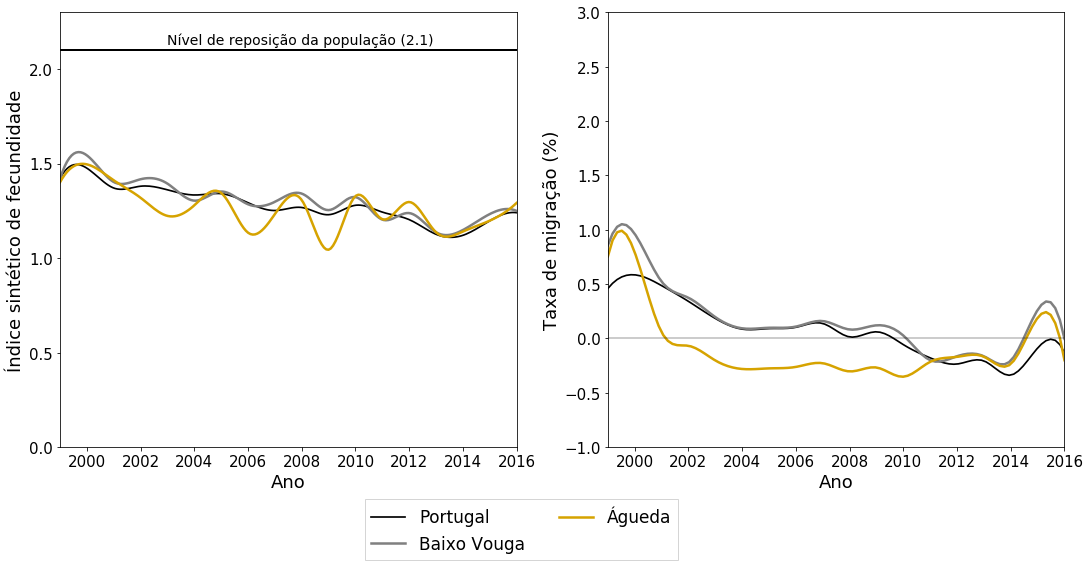

In [11]:
def linha_amaciada(l, N): 
    x = l.index.astype(np.float)
    y = l.values.astype(np.float)
    t, c, k = interpolate.splrep(x, y, s=0, k=3)
    xx = np.linspace(x.min(), x.max(), N)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)
    return(xx, spline(xx))

municipio = '0101'
nome_municipio = df_TFR.loc[municipio, : ].Município_Designação
NUT_3 = df_TFR.loc[municipio, : ].NUTS_3_2002_Designação

# Vila Nova da Barquinha 1420
# Ourém 1421

plt.rcParams["figure.figsize"] = [18,8]
fig, ax = plt.subplots(1,2)
colours = ['black', 'grey', [214/255,163/255,0]]
labels = ['Portugal', NUT_3,nome_municipio]
linewiths = [1.7, 2.5, 2.5]
tick_spacing = 2

l = list()
l.append(df_TFR.loc[:,'1999':'2016'].mean())
l.append(df_TFR.loc[df_TFR.NUTS_3_2002_Designação == NUT_3, '1999':'2016'].mean())
l.append(df_TFR.loc[municipio,'1999':'2016'])
l

x=0 
for i in l:
    lista = linha_amaciada(i, 200)
    ax[0].plot(lista[0], lista[1], linewidth=linewiths[x], color = colours[x], label = labels[x])
    x+=1
ax[0].set_xlabel('Ano', fontsize = 18)
ax[0].set_ylabel('Índice sintético de fecundidade', fontsize = 18)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[0].plot([1998, 2017],[2.1, 2.1], color='k', linestyle='-', linewidth=2)
ax[0].annotate('Nível de reposição da população (2.1)', xy=(2003, 2.13), size = 14)
ax[0].set_xlim([1999, 2016])
ax[0].set_ylim([0, 2.3])

l = list()
l.append(df_migrations.loc[:,'1999':'2016'].mean())
l.append(df_migrations.loc[df_TFR.NUTS_3_2002_Designação == NUT_3, '1999':'2016'].mean())
l.append(df_migrations.loc[municipio,'1999':'2016'])


x=0 
for i in l:
    lista = linha_amaciada(i, 100)
    ax[1].plot(lista[0], lista[1], linewidth=linewiths[x], color = colours[x], label = labels[x])
    x+=1
ax[1].set_xlabel('Ano', fontsize = 18)
ax[1].set_ylabel('Taxa de migração (%)', fontsize = 18)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].plot([1998, 2017],[0, 0], color='k', linestyle='-', linewidth=2, alpha = 0.2)
ax[1].set_xlim([1999, 2016])
ax[1].set_ylim([-1, 3])

handles, labels = ax[0].get_legend_handles_labels()
order = [0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], prop={'size': 17},\
          loc='upper center', bbox_to_anchor=(-0.19, -0.1),
          fancybox=False, shadow=False, ncol=2)


#plt.rcParams.update()

# plt.savefig('TFR_MIG_{0}.png'.format(nome_municipio), dpi=600,  bbox_inches="tight")


In [12]:
# df_nados_totais.loc[df_TFR.NUTS_3_2002_Designação == NUT_3, '1999':'2016'].mean()
# df_nados_totais.groupby(NUTS_3_2002_Código)

# df_nados_totais.groupby(['NUTS_3_2002_Código']).sum()
df_pop_total.groupby(['NUTS_3_2002_Código']).mean()

,ano,h0_4,h5_9,h10_14,h15_19,h20_24,h25_29,h30_34,h35_39,h40_44,...,50_54,55_59,60_64,65_69,70_74,75_79,80_84,85 e mais,soma_p,0_4_soma
NUTS_3_2002_Código,,,,,,,,,,,,,,,,,,,,,
111,2004.0,551.455556,620.148148,713.196296,790.359259,804.574074,783.592593,787.555556,800.677778,789.618519,...,829.118519,818.781481,814.118519,805.170370,753.992593,653.751852,488.333333,393.740741,26198.411111,1075.211111
112,2004.0,1922.487654,2063.246914,2255.524691,2445.808642,2522.067901,2518.882716,2527.339506,2487.740741,2359.444444,...,2048.154321,1806.543210,1612.265432,1430.765432,1234.901235,1013.790123,728.030864,568.851852,67091.308642,3734.111111
113,2004.0,1745.888889,1901.097222,2099.847222,2287.611111,2363.152778,2384.500000,2411.310185,2424.013889,2357.898148,...,2061.037037,1827.902778,1627.148148,1414.013889,1189.282407,945.032407,651.041667,466.967593,64396.685185,3384.759259
114,2004.0,3681.493827,3797.514403,4077.835391,4478.296296,4792.617284,5009.304527,5186.757202,5231.831276,5118.786008,...,4946.436214,4504.337449,4099.259259,3643.213992,3061.855967,2438.596708,1735.794239,1343.818930,140071.139918,7166.008230
115,2004.0,1098.602469,1196.817284,1303.493827,1400.992593,1429.237037,1410.753086,1403.441975,1387.644444,1320.708642,...,1080.523457,951.866667,852.876543,766.570370,668.476543,543.333333,381.777778,276.167901,37935.479012,2138.809877
116,2004.0,1424.437037,1544.555556,1687.318519,1844.985185,1931.762963,1987.866667,2054.303704,2095.985185,2049.466667,...,1837.503704,1650.696296,1477.022222,1306.081481,1114.525926,895.429630,631.074074,488.570370,55828.740741,2782.111111
117,2004.0,255.233918,290.660819,343.076023,386.791423,393.473684,372.366472,363.596491,371.974659,374.873294,...,366.089669,359.814815,358.261209,356.828460,338.955166,290.245614,214.680312,170.489279,13170.807018,496.614035
118,2004.0,294.111111,343.007937,417.261905,482.351852,484.653439,451.626984,440.960317,463.645503,484.812169,...,516.399471,528.394180,536.907407,536.838624,512.055556,436.439153,322.119048,258.296296,17059.150794,575.108466
150,2004.0,666.962963,670.476852,698.921296,750.509259,796.395833,846.997685,910.782407,937.210648,913.817130,...,825.557870,787.324074,759.775463,724.405093,660.233796,562.171296,423.233796,347.319444,27184.928241,1298.127315
